# Overview of Data Cleaning
 # Tashinga Mhlanga 
          based on Titanic Dataset

Involves identifying and removing any missing duplicate or irrelevant data.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# How to Perform Data Cleanliness?
Removal of Unwanted Observations
Fixing Structure errors
Managing outliers:
Handling Missing Data:

In [28]:
df.duplicated() 


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Check the Categorical and Numerical Columns

In [30]:
cat_col =[]
for col in df.columns:
    if df[col].dtype != "object":
        cat_col.append(col)
cat_col   


['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Check the total number of Unique Values in the Categorical Columns and 

In [31]:
df['Ticket'].unique()[:50]


array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

Removal of all Above Unwanted Observations
Drop Name and Ticket Columns

In [32]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape


(891, 10)

# Handling Missing Data

Missing data is a common issue in real-world datasets and it can occur due to various reasons such as human errors, system failures or data collection issues

df.isnull() it checks whether the values are null or not and gives returns boolean values and sum() will sum the total number of null values rows and we divide it by the total number of rows present in the dataset then we multiply to get values in i.e per 100 values how much values are null

In [33]:
round((df1.isnull().sum()/df1.shape[0])*100,2)


PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

As we can see from the above result that Cabin has 77% null values and Age has 19.87% and Embarked has 0.22% of null values.

So, it’s not a good idea to fill 77% of null values. So we will drop the Cabin column. Embarked column has only 0.22% of null values so, we drop the null values rows of Embarked column.

In [34]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape


(889, 9)

# Mean imputation

Mean imputation is suitable when the data is normally distributed and has no extreme outliers.
Median imputation is preferable when the data contains outliers or is skewed.


In [35]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
df3.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Handling Outliers
Outliers are extreme values that deviate significantly from the majority of the data. They can negatively impact the analysis and model performance. Techniques such as clustering, interpolation or transformation can be used to handle outliers.

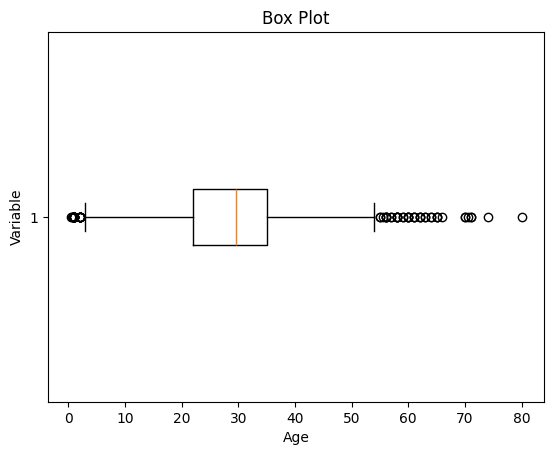

In [36]:

plt.boxplot(df3['Age'],vert= False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()


 # Drop the outliers

As we can see from the above Box and whisker plot, Our age dataset has outliers values. The values less than 5 and more than 55 are outliers.

In [37]:
# calculate summary statistics
mean = df3['Age'].mean()
std  = df3['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound) 
                & (df3['Age'] <= upper_bound)]


Lower Bound : 3.7054001079256587
Upper Bound : 55.57878528533277


 # Data validation and verification
Data validation and verification involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge. 

For the machine learning prediction we separate independent and target features. Here we will consider only ‘Sex’ ‘Age’ ‘SibSp’, ‘Parch’ ‘Fare’ ‘Embarked’ only as the independent features and Survived as target variables because PassengerId will not affect the survival rate.

In [38]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']


# Data formatting
Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization

# Min-Max Scaling:
Min-Max scaling rescales the values to a specified range, typically between 0 and 1. It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [39]:

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']

X[num_col_] = scaler.fit_transform(X[num_col_])
X.head()



C:\Users\student\AppData\Local\Temp\ipykernel_9996\3095833704.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_col_] = scaler.fit_transform(X[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S
